In [1]:
import pandas as pd

In [4]:
dados = pd.read_csv('aluguel_residencial.csv', sep = ';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.0,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.0,Casa
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,35.0,Apartamento
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.0,Apartamento
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,17.0,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.0,Apartamento
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.0,Casa
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,0.0,0.0,15.0,Casa
8,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0,50.0,Apartamento
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.0,Apartamento


In [6]:
dados['Valor'].mean()

7345.552032406761

In [7]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados['Bairro'].isin(bairros)
dados = dados[selecao]

In [8]:
dados['Bairro'].drop_duplicates()

0          Copacabana
2     Barra da Tijuca
17             Tijuca
22            Ipanema
26           Botafogo
31             Leblon
98           Flamengo
Name: Bairro, dtype: object

In [13]:
grupo_bairro = dados.groupby('Bairro')

In [14]:
for bairro, dados in grupo_bairro: 
    print(bairro)

Barra da Tijuca
Botafogo
Copacabana
Flamengo
Ipanema
Leblon
Tijuca


In [15]:
for bairro, dados in grupo_bairro: 
    print('{} -> {}'.format(bairro, dados.Valor.mean()))

Barra da Tijuca -> 7754.742227749156
Botafogo -> 16303.21619217082
Copacabana -> 4231.040507220852
Flamengo -> 6619.704225352113
Ipanema -> 10068.357068607069
Leblon -> 10034.338484179543
Tijuca -> 2106.6116504854367


In [29]:
data2 = grupo_bairro[['Valor','Condominio']].mean().round(2)
data2

,Valor,Condominio
Bairro,,
Barra da Tijuca,7754.74,3474.22
Botafogo,16303.22,3303.82
Copacabana,4231.04,1184.80
Flamengo,6619.70,1933.70
Ipanema,10068.36,2322.78
Leblon,10034.34,2295.42
Tijuca,2106.61,749.66


In [31]:
data2.to_csv('bairros_eita.csv', sep = ';', index = True)

In [32]:
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum'])
grupo_bairro['Valor'].aggregate(['min', 'max', 'sum']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo,sum
Bairro,,,
Barra da Tijuca,100.0,614000.0,43651444.0
Botafogo,299.0,4500000.0,18324815.0
Copacabana,100.0,198000.0,12011924.0
Flamengo,800.0,212544.0,5169989.0
Ipanema,900.0,800000.0,19371519.0
Leblon,100.0,110000.0,13636666.0
Tijuca,399.0,70000.0,2603772.0


In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

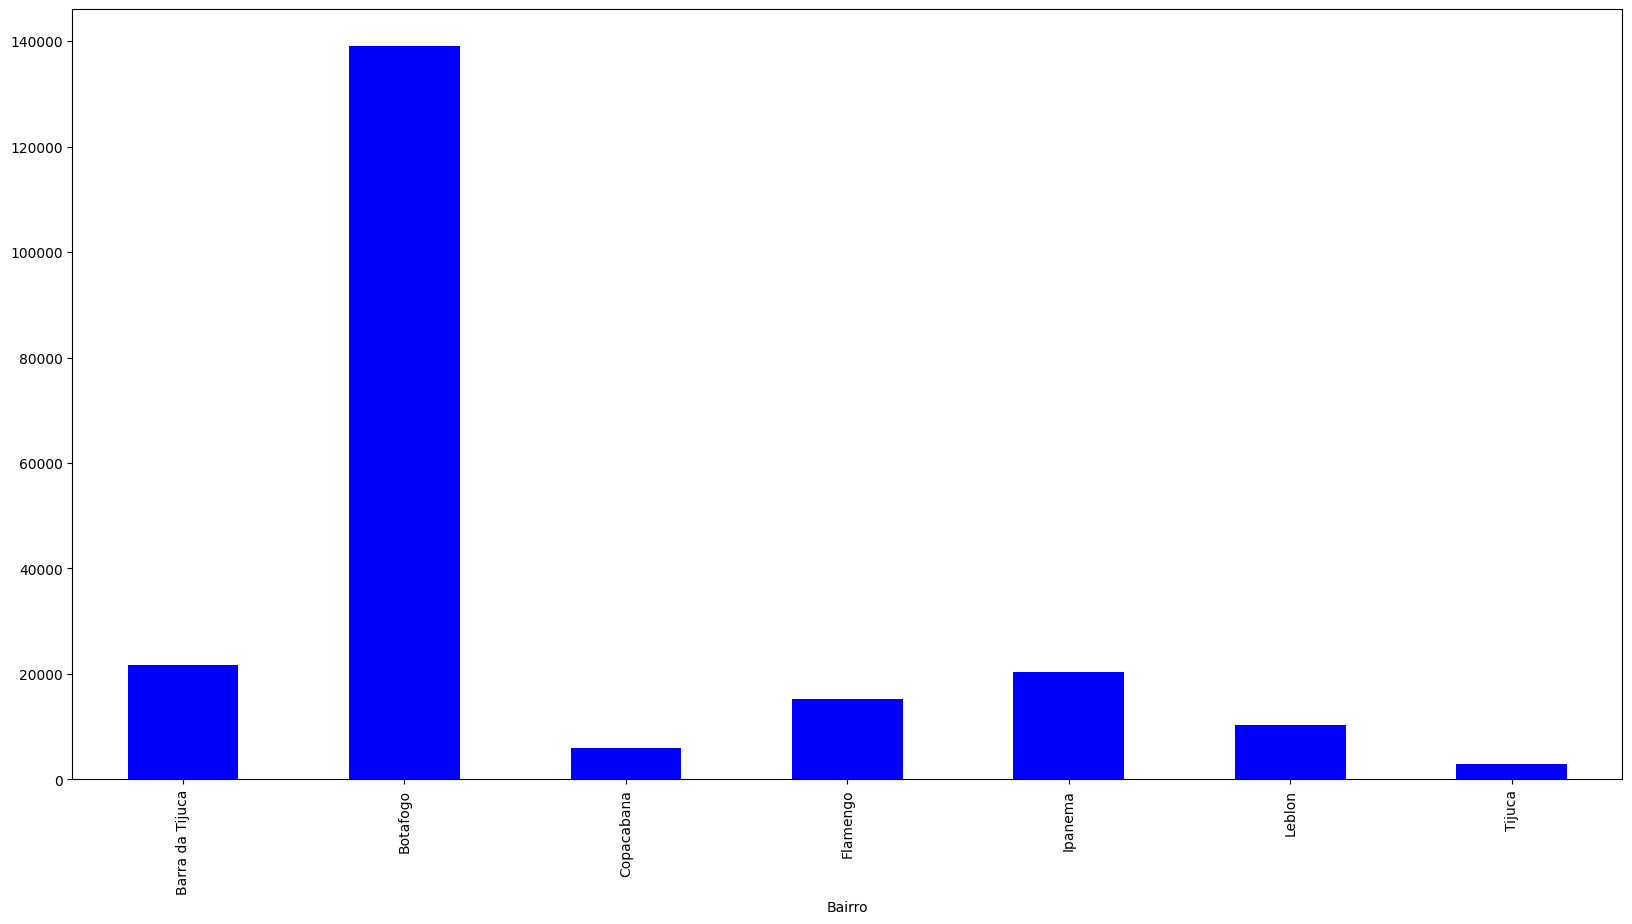

In [35]:
fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

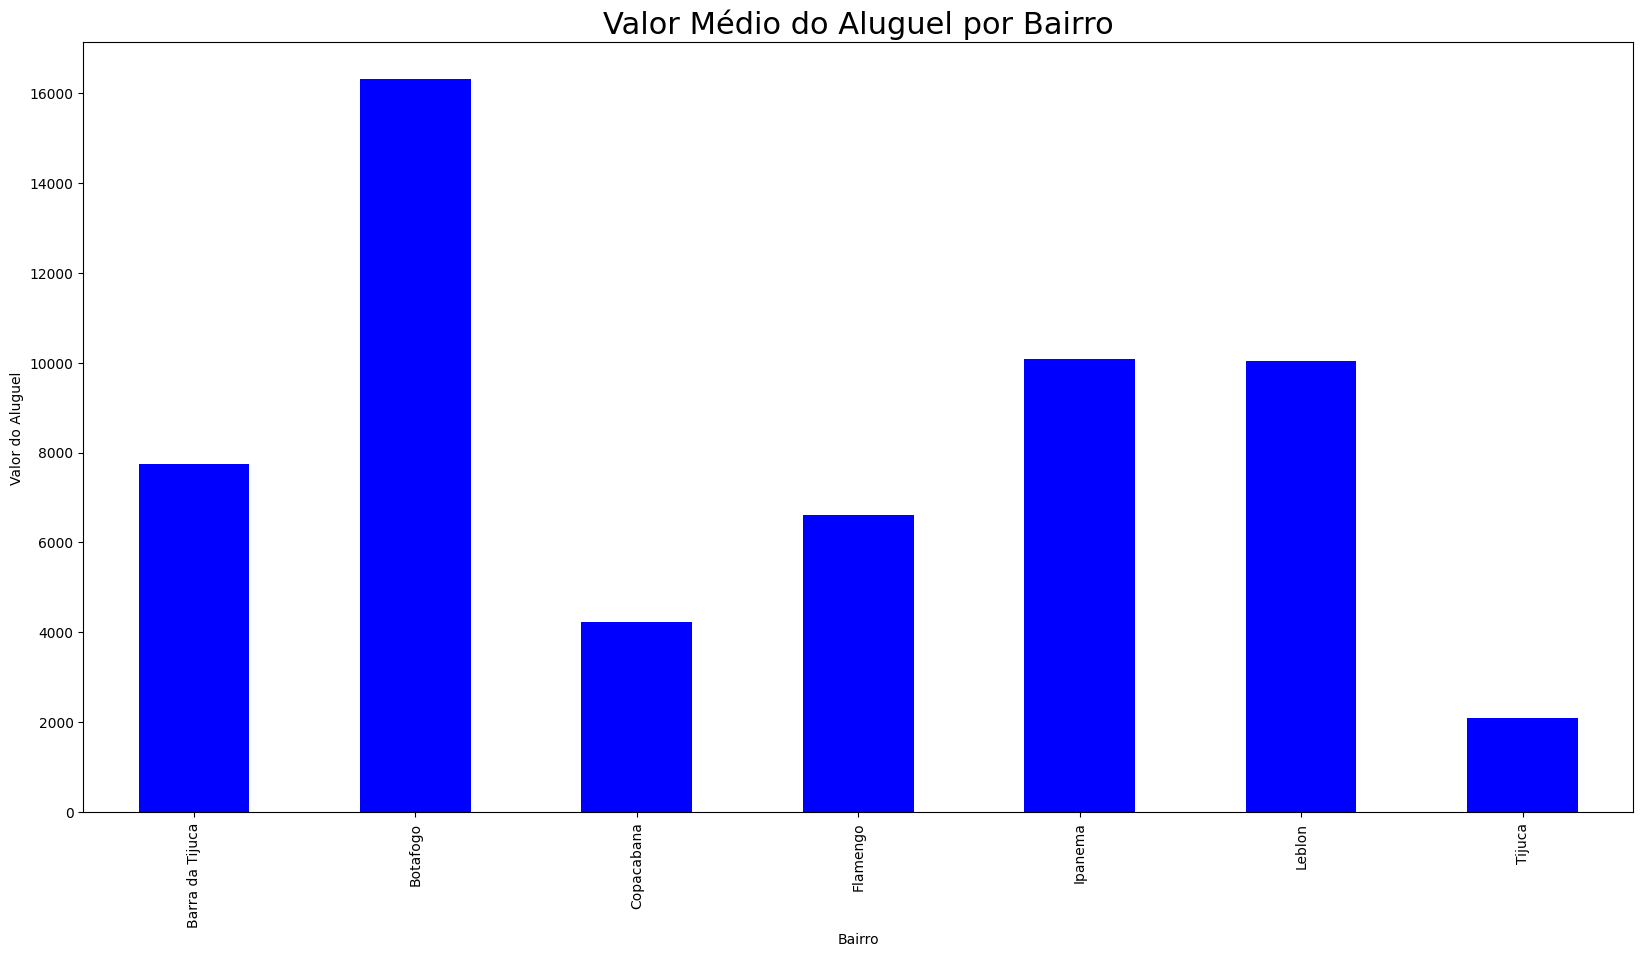

In [36]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})